# MINI PROJECT BD-02
<img src="bg1bd.jpg">

# Deskripsi Project
Dataframes yang digunakan dalam mini project ini adalah data penduduk kota Semarang.

Adapun kegiatan yang dilakukan pada dataframe ini yaitu:
# A. Data Analisis
1. Menghitung total penduduk dari seluruh kecamatan di kota Semarang
2. Menampilkan data dikecamatan tertentu berdasarkan inputan user
3. Menampilkan column kecamatan berdasarkan laki-laki terbanyak dan laki-laki paling sedikit di Kota Semarang
4. Menampilkan column kecamatan berdasarkan jumlah perempuan paling banyak di Kota Semarang
5. Menghitung persentase jumlah anak-anak di Kota Semarang
6. Menampilkan data dengan jumlah lansia paling sedikit di kota Semarang
7. Menampilkan column kecamatan dan column pekerjaan berdasarkan pendidikan S1 di Kota Semarang
8. Menampilkan column pendidikan berdasarkan pekerjaan petani dan nelayan di Kota Semarang
9. Menghitung nilai MIN dan MAX dari jumlah penduduk di Kota Semarang
10. Mengurutkan dataframe penduduk berdasarkan jumlah penduduk terbesar

# B. Visualisasi
11. Menampilkan Grafik Jumlah Penduduk dari seluruh kecamatan di kota Semarang
12. Menampilkan Grafik perbandingan laki-laki dan perempuan

# C. Insert, Edit, and Delete Data
13. Menambahkan data baru pada penduduk.csv:
id         = 17,
kecamatan  = Konoha,
laki-laki  = 3150,
perempuan  = 4350,
anak-anak  = 1550,
dewasa     = 3950,
lansia     = 2000,
penduduk   = 7500,
pekerjaan  = Ninja,
pendidikan = Shinobi.
14. Mengedit pendidikan dari kecamatan Banyumanik menjadi S1
15. Melakukan Delete kecamatan Konoha

# Membaca Dataframes penduduk.csv

Sebelum memulai kegiatan data analisis, kita melakukan deklarasi untuk melakukan pembacaan file penduduk.csv

In [1]:
import pandas as pd
penduduk = pd.read_csv('penduduk.csv')
penduduk.iloc[0:]

,id,kecamatan,laki-laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan
0,1,Semarang Tengah,30118,32521,15467,38205,8967,62639,Pegawai,S1
1,2,Semarang Barat,79106,80898,23122,111759,25123,160004,Buruh Pabrik,SMA
2,3,Semarang Utara,62028,63928,32123,77961,15872,125956,Nelayan,SMA
3,4,Semarang Timur,36692,38781,37823,22027,15623,75473,Buruh Pabrik,SMA
4,5,Gayamsari,36971,37187,32182,38590,3386,74158,Petani,SMP
5,6,Gajah Mungkur,29637,30443,15223,35905,8952,60080,Pengusaha,S1
6,7,Genuk,54623,53910,26530,66725,15278,108533,Guru,S1
7,8,Pedurungan,93582,94356,40834,129859,17245,187938,Pengusaha,S1
8,9,Candisari,40121,41246,24251,49464,7652,81367,Petani,SMA
9,10,Banyumanik,67906,68960,32905,97089,6872,136866,Pengusaha,SMA


# 1. Menghitung total penduduk dari seluruh kecamatan di kota Semarang

In [2]:
import pandas as pd
penduduk = pd.read_csv('penduduk.csv')

#mengambil data kolom penduduk
tbtot = penduduk['penduduk']

# menghitung panjang array 
n = len(tbtot)

#menghitung total penduduk kota semarang
totpend = sum(tbtot)

#mencetak hasil
print("Total penduduk kota Semarang sebanyak", totpend, "jiwa")

Total penduduk kota Semarang sebanyak 1648279 jiwa


# 2. Menampilkan data di kecamatan tertentu berdasarkan inputan user

In [3]:
from sqlalchemy import create_engine
from pandas.io import sql

#membuat database engine
engine = create_engine("sqlite:///:memory:")

#menyimpan dataframe menjadi tabel
penduduk.to_sql("data_table",engine)

#mencari kecamatan semarang gayamsari
kec = input("Masukkan nama kecamatan:")
cari = pd.read_sql_query("SELECT * FROM data_table WHERE kecamatan like (?)",engine, params=[kec])
cari.iloc[0:]

Masukkan nama kecamatan:banyumanik


,index,id,kecamatan,laki-laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan
0,9,10,Banyumanik,67906,68960,32905,97089,6872,136866,Pengusaha,SMA


# 3. Menampilkan column kecamatan berdasarkan Penduduk terbanyak dan paling sedikit di kota Semarang

In [11]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('penduduk.csv')

#create the db engine
engine = create_engine('sqlite:///:memory:')

#store the datraframe as a table
data.to_sql('data_table', engine)

#Read from the relational databases
print("Kecamatan dengan penduduk laki-laki paling banyak adalah")
print("----------------------------------------------")
res1 = pd.read_sql_query('SELECT kecamatan, Max("laki-laki") FROM data_table', engine)
print(res1)
print("----------------------------------------------")
print("Kecamatan dengan penduduk laki-laki paling sedikit adalah")
print("----------------------------------------------")
res2 = pd.read_sql_query('SELECT kecamatan, Min("laki-laki") FROM data_table', engine)
print(res2)
print("----------------------------------------------")

Kecamatan dengan penduduk laki-laki paling banyak adalah
----------------------------------------------
    kecamatan  Max("laki-laki")
0  Pedurungan             93582
----------------------------------------------
Kecamatan dengan penduduk laki-laki paling sedikit adalah
----------------------------------------------
  kecamatan  Min("laki-laki")
0      Tugu             16518
----------------------------------------------


#  4. Menampilkan column kecamatan berdasarkan jumlah perempuan paling banyak di Kota Semarang

In [12]:
from sqlalchemy import create_engine
from pandas.io import sql

#membuat database engine
engine = create_engine("sqlite:///:memory:")

#menyimpan dataframe menjadi tabel
penduduk.to_sql("data_table",engine)

perem = pd.read_sql_query('SELECT kecamatan, Max(perempuan) FROM data_table',engine)
print("Data Perempuan Paling banyak Se Kota Semarang")
print("-------------------------------------------")
perem.iloc[0:]

Data Perempuan Paling banyak Se Kota Semarang
-------------------------------------------


,kecamatan,Max(perempuan)
0,Pedurungan,94356


#  5. Menghitung persentase anak-anak di kota Semarang

In [13]:
tbank = penduduk['anak_anak']

totank = sum(tbank)

#mengitung presentase populasi anak-anak di kota Semarang
prosank = totank/totpend

#mencetak hasil
print("Presentase populasi anak-anak di kota Semarang sebesar "+"{:.2%}".format(prosank))

Presentase populasi anak-anak di kota Semarang sebesar 27.49%


# 6. Menampilkan data jumlah lansia paling sedikit

In [14]:
from sqlalchemy import create_engine
from pandas.io import sql

#membuat database engine
engine = create_engine("sqlite:///:memory:")

#menyimpan dataframe menjadi tabel
penduduk.to_sql("data_table",engine)

lansia = pd.read_sql_query('SELECT kecamatan, Min(lansia) FROM data_table',engine)
print("Data Lansia Paling Sedikit Se Kota Semarang")
print("-------------------------------------------")
print(lansia)

Data Lansia Paling Sedikit Se Kota Semarang
-------------------------------------------
  kecamatan  Min(lansia)
0      Tugu         2156


# 7. Menampilkan column kecamatan dan column pekerjaan berdasarkan pendidikan S1 di Kota Semarang

In [15]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

#create the db engine
engine = create_engine('sqlite:///:memory:')

#store the datraframe as a table
data.to_sql('data_table', engine)

#Read from the relational databases
print("----------------------------------------------------------------")
print("Data kecamatan dan pekerjaan berdasarkan rata-rata pendidikan S1")
print("----------------------------------------------------------------")
res1 = pd.read_sql_query('SELECT kecamatan, pekerjaan, pendidikan FROM data_table where pendidikan = (?)', engine, params=[('S1')])
res1.iloc[0:]

----------------------------------------------------------------
Data kecamatan dan pekerjaan berdasarkan rata-rata pendidikan S1
----------------------------------------------------------------


,kecamatan,pekerjaan,pendidikan
0,Semarang Tengah,Pegawai,S1
1,Gajah Mungkur,Pengusaha,S1
2,Genuk,Guru,S1
3,Pedurungan,Pengusaha,S1
4,Tugu,Pegawai,S1
5,Mijen,Guru,S1
6,Semarang Selatan,Pegawai,S1


# 8. Menampilkan column pendidikan berdasarkan pekerjaan petani dan nelayan di Kota Semarang

In [16]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

#create the db engine
engine = create_engine('sqlite:///:memory:')

#store the datraframe as a table
data.to_sql('data_table', engine)

#Read from the relational databases
print("--------------------------------------------------------------------------")
print("Data rata-rata pendidikan dan relasinya dengan mayoritas pekerjaan nelayan")
print("--------------------------------------------------------------------------")
res1 = pd.read_sql_query('SELECT kecamatan, pendidikan, pekerjaan FROM data_table where pekerjaan = (?)', engine, params=[('Nelayan')])
res2 = pd.read_sql_query('SELECT kecamatan, pendidikan, pekerjaan FROM data_table where pekerjaan = (?)', engine, params=[('Petani')])
print(res1.loc[0:])
print("-------------------------------------------------------------------------")
print("Data rata-rata pendidikan dan relasinya dengan mayoritas pekerjaan petani")
print("-------------------------------------------------------------------------")
print(res2.loc[0:])

--------------------------------------------------------------------------
Data rata-rata pendidikan dan relasinya dengan mayoritas pekerjaan nelayan
--------------------------------------------------------------------------
        kecamatan pendidikan pekerjaan
0  Semarang Utara        SMA   Nelayan
1        Ngaliyan        SMA   Nelayan
-------------------------------------------------------------------------
Data rata-rata pendidikan dan relasinya dengan mayoritas pekerjaan petani
-------------------------------------------------------------------------
    kecamatan pendidikan pekerjaan
0   Gayamsari        SMP    Petani
1   Candisari        SMA    Petani
2  Gunungpati        SMP    Petani


# 9. Mencari populasi paling kecil dan paling besar di seluruh kecamatan di Kota Semarang

In [17]:
#mencari nilai paling kecil dalam bentuk int
kicik = min(tbtot)

#mencari nilai paling kecil di kolom jumlah penduduk
kic = penduduk[penduduk.penduduk == kicik]

#mencari nilai paling kecil dalam bentuk int
gedong = max(tbtot)

#mencari nilai paling kecil di kolom jumlah penduduk
ged = penduduk[penduduk.penduduk == gedong]

#mencetak populasi terkecil di tabel
print("---------------------------------")
print("Populasi kecamatan paling Kecil")
print("---------------------------------")
print("Kecamatan  Jumlah Penduduk")
for index, row in kic.iterrows():
    print(row['kecamatan'],'     ',row['penduduk'])
    
#mencetak populasi terbesar di tabel
print("\n---------------------------------")
print("Populasi kecamatan paling Besar")
print("---------------------------------")
print("Kecamatan     Jumlah Penduduk")
for index, row in ged.iterrows():
    print(row['kecamatan'],'  ',row['penduduk'])

---------------------------------
Populasi kecamatan paling Kecil
---------------------------------
Kecamatan  Jumlah Penduduk
Tugu       32873

---------------------------------
Populasi kecamatan paling Besar
---------------------------------
Kecamatan     Jumlah Penduduk
Pedurungan    187938


# 10. Mengurutkan dataframe penduduk berdasarkan jumlah penduduk terbesar

In [18]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

#create the db engine
engine = create_engine('sqlite:///:memory:')

#store the datraframe as a table
data.to_sql('data_table', engine)

terbesar = pd.read_sql_query('SELECT kecamatan, penduduk FROM data_table ORDER BY penduduk DESC',engine)
print("------------------------------------------------------------------")
print('Mengurutkan dari Terbanyak ke Terkecil berdasarkan Jumlah Penduduk')
print("------------------------------------------------------------------")
terbesar.iloc[0:]

------------------------------------------------------------------
Mengurutkan dari Terbanyak ke Terkecil berdasarkan Jumlah Penduduk
------------------------------------------------------------------


,kecamatan,penduduk
0,Pedurungan,187938
1,Tembalang,171993
2,Semarang Barat,160004
3,Banyumanik,136866
4,Ngaliyan,136791
5,Semarang Utara,125956
6,Genuk,108533
7,Gunungpati,89809
8,Candisari,81367
9,Semarang Selatan,75757


# 11. Menampilkan Grafik Jumlah Penduduk

In [19]:
import matplotlib.pyplot as plt

penduduk.set_index('kecamatan')[['penduduk']].plot.barh()
print("---------------------------------------")
print(penduduk.loc[:, ['kecamatan','penduduk']])
print("---------------------------------------")
plt.show()

---------------------------------------
           kecamatan  penduduk
0    Semarang Tengah     62639
1     Semarang Barat    160004
2     Semarang Utara    125956
3     Semarang Timur     75473
4          Gayamsari     74158
5      Gajah Mungkur     60080
6              Genuk    108533
7         Pedurungan    187938
8          Candisari     81367
9         Banyumanik    136866
10        Gunungpati     89809
11         Tembalang    171993
12              Tugu     32873
13          Ngaliyan    136791
14             Mijen     68042
15  Semarang Selatan     75757
---------------------------------------


<Figure size 640x480 with 1 Axes>

# 12. Menampilkan Grafik perbandingan penduduk laki-laki dan perempuan

In [20]:
import matplotlib.pyplot as plt

penduduk.set_index('kecamatan')[['laki_laki','perempuan']].plot.barh()
print("Table Jumlah Penduduk Kecamatan di Kota Semarang")
print("---------------------------------------")
print(penduduk.loc[:, ['kecamatan','laki_laki','perempuan']])
print("---------------------------------------")
print("Grafik Perbandignan Jumlah Penduduk Laki-laki dan Perempuan")
plt.show()

KeyError: "['laki_laki'] not in index"

# 13. Menambahkan data baru pada penduduk.csv:
id         = 17,
<br>kecamatan  = Konoha,
<br>laki-laki  = 3150,
<br>perempuan  = 4350,
<br>anak-anak  = 1550,
<br>dewasa     = 3950,
<br>lansia     = 2000,
<br>penduduk   = 7500,
<br>pekerjaan  = Ninja,
<br>pendidikan = Shinobi.

In [ ]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

# Create the db engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
data.to_sql('data_kecamatan', engine)


#insert "konoha"

sql.execute("INSERT INTO data_kecamatan VALUES(?,?,?,?,?,?,?,?,?,?,?)",engine,params=[(16,17,"Konoha",3150,4350,1550,3950,2000,7500,"Ninja","Shinobi")])
tambah = pd.read_sql_query('SELECT id,kecamatan,laki_laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan FROM data_kecamatan', engine)
tambah.iloc[0:]

# 14. Mengedit pendidikan dari kecamatan Banyumanik menjadi S1

In [21]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

# Create the db engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
data.to_sql('data_kecamatan', engine)

sql.execute("UPDATE data_kecamatan SET pendidikan = 'S1' WHERE kecamatan = 'Banyumanik'",engine)
edit = pd.read_sql_query("SELECT * FROM data_kecamatan", engine)
edit.iloc[0:]

,index,id,kecamatan,laki_laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan
0,0,1,Semarang Tengah,30118,32521,15467,38205,8967,62639,Pegawai,S1
1,1,2,Semarang Barat,79106,80898,23122,111759,25123,160004,Buruh Pabrik,SMA
2,2,3,Semarang Utara,62028,63928,32123,77961,15872,125956,Nelayan,SMA
3,3,4,Semarang Timur,36692,38781,37823,22027,15623,75473,Buruh Pabrik,SMA
4,4,5,Gayamsari,36971,37187,32182,38590,3386,74158,Petani,SMP
5,5,6,Gajah Mungkur,29637,30443,15223,35905,8952,60080,Pengusaha,S1
6,6,7,Genuk,54623,53910,26530,66725,15278,108533,Guru,S1
7,7,8,Pedurungan,93582,94356,40834,129859,17245,187938,Pengusaha,S1
8,8,9,Candisari,40121,41246,24251,49464,7652,81367,Petani,SMA
9,9,10,Banyumanik,67906,68960,32905,97089,6872,136866,Pengusaha,S1


# 15. Melakukan Delete kecamatan Konoha

In [22]:
from sqlalchemy import create_engine
from pandas.io import sql

import pandas as pd

data = pd.read_csv('E:/mini/penduduk.csv')

#create the db engine
engine = create_engine('sqlite:///:memory:')

#store the datraframe as a table
data.to_sql('data_table', engine)

#insert Another Row
sql.execute('DELETE FROM data_table where kecamatan = (?)', engine, params=[('Konoha')])

#Read from the relational databases
dele = pd.read_sql_query('SELECT id,kecamatan,laki_laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan FROM data_table', engine)
dele.iloc[0:]

,id,kecamatan,laki_laki,perempuan,anak_anak,dewasa,lansia,penduduk,pekerjaan,pendidikan
0,1,Semarang Tengah,30118,32521,15467,38205,8967,62639,Pegawai,S1
1,2,Semarang Barat,79106,80898,23122,111759,25123,160004,Buruh Pabrik,SMA
2,3,Semarang Utara,62028,63928,32123,77961,15872,125956,Nelayan,SMA
3,4,Semarang Timur,36692,38781,37823,22027,15623,75473,Buruh Pabrik,SMA
4,5,Gayamsari,36971,37187,32182,38590,3386,74158,Petani,SMP
5,6,Gajah Mungkur,29637,30443,15223,35905,8952,60080,Pengusaha,S1
6,7,Genuk,54623,53910,26530,66725,15278,108533,Guru,S1
7,8,Pedurungan,93582,94356,40834,129859,17245,187938,Pengusaha,S1
8,9,Candisari,40121,41246,24251,49464,7652,81367,Petani,SMA
9,10,Banyumanik,67906,68960,32905,97089,6872,136866,Pengusaha,SMA


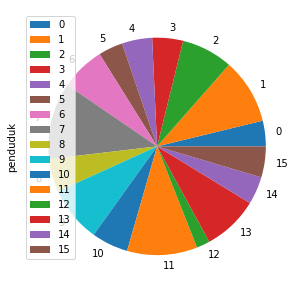

In [23]:
plot = data.plot.pie(y='penduduk', figsize=(5, 5))